In [1]:
import numpy as np

# Process Iris data

In [2]:
with open("iris/iris.data") as f:
    lines = [l[:-1] for l in f.readlines()]
    
# Put numbers on the strings
n = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
x = [n.index(l.split(",")[-1]) for l in lines if l != ""]
x = np.array(x, dtype="uint8")

# Build an array with everything else
y = [[float(j) for j in i.split(",")[:-1]] for i in lines if i != ""]
y = np.array(y)

# Shuffle things up
i = np.argsort(np.random.random(x.shape[0]))
x = x[i]
y = y[i]

np.save("iris/iris_features.npy", y)
np.save("iris/iris_labels.npy", x)

# Process breast cancer data

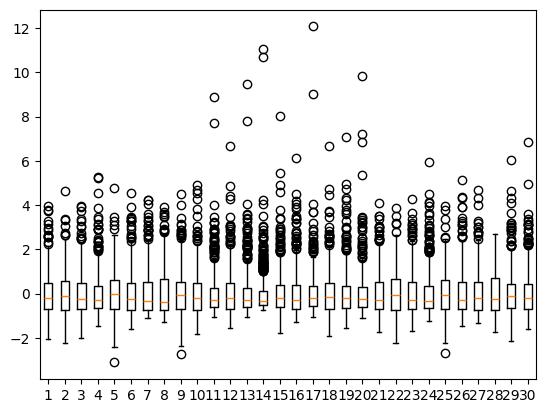

In [3]:
import matplotlib.pyplot as plt

with open("breast/wdbc.data") as f:
    lines = [i[:-1] for i in f.readlines() if i!=""]
    
n= ["B", "M"]
x = np.array([n.index(i.split(",")[1]) for i in lines],dtype="uint8")
y = np.array([[float(j) for j in i.split(",")[2:]] for i in lines])
i = np.argsort(np.random.random(x.shape[0]))
x = x[i]
y = y[i]
z = (y - y.mean(axis=0)) / y.std(axis=0)

np.save("breast/bc_features.npy", y)
np.save("breast/bc_features_standard.npy",z)
np.save("breast/bc_labels.npy", x)
plt.boxplot(z)
plt.show()

# Process MNIST data

In [4]:
import keras
from keras.datasets import mnist

(xtrn, ytrn), (xtst, ytst) = mnist.load_data()
idx = np.argsort(np.random.random(ytrn.shape[0]))
xtrn = xtrn[idx]
ytrn = ytrn[idx]
idx = np.argsort(np.random.random(ytst.shape[0]))
xtst = xtst[idx]
ytst = ytst[idx]

np.save("mnist/mnist_train_images.npy", xtrn)
np.save("mnist/mnist_train_labels.npy", ytrn)
np.save("mnist/mnist_test_images.npy", xtst)
np.save("mnist/mnist_test_labels.npy", ytst)

xtrnv = xtrn.reshape((60000,28*28))
xtstv = xtst.reshape((10000, 28*28))
np.save("mnist/mnist_train_vectors.npy", xtrnv)
np.save("mnist/mnist_test_vectors.npy", xtstv)

idx = np.argsort(np.random.random(28*28))
for i in range(60000):
    xtrnv[i,:] = xtrnv[i, idx]
for i in range(10000):
    xtstv[i,:] = xtstv[i, idx]
np.save("mnist/mnist_train_scrambled_vectors.npy", xtrnv)
np.save("mnist/mnist_test_scrambled_vectors.npy", xtstv)

t = np.zeros((60000,28,28))
for i in range(60000):
    t[i,:,:] = xtrnv[i,:].reshape((28,28))
np.save("mnist/mnist_train_scrambled_images.npy", t)
t = np.zeros((10000,28,28))
for i in range(10000):
    t[i,:,:] = xtstv[i,:].reshape((28,28))
np.save("mnist/mnist_test_scrambled_images.npy", t)

2026-01-12 15:09:21.962461: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-12 15:09:21.962920: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-12 15:09:21.997258: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI AVX_VNNI_INT8 AVX_NE_CONVERT FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-12 15:09:22.888154: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computat

# Process CIFAR-10 data

In [ ]:
from keras.datasets import cifar10

(xtrn, ytrn), (xtst, ytst) = cifar10.load_data()
idx = np.argsort(np.random.random(ytrn.shape[0]))
xtrn = xtrn[idx]
ytrn = ytrn[idx]
idx = np.argsort(np.random.random(ytst.shape[0]))
xtst = xtst[idx]
ytst = ytst[idx]

np.save("cifar10/cifar10_train_images.npy", xtrn)
np.save("cifar10/cifar10_train_labels.npy", ytrn)
np.save("cifar10/cifar10_test_images.npy", xtst)
np.save("cifar10/cifar10_test_labels.npy", ytst)

xtrnv = xtrn.reshape((50000, 32*32*3))
xtstv = xtst.reshape((10000, 32*32*3))
np.save("cifar10/cifar10_train_vectors.npy", xtrnv)
np.save("cifar10/cifar10_test_vectors.npy", xtstv)